### 离中趋势度量

In [1]:
import pandas as pd

In [2]:
catering_sale = './chapter3/demo/data/catering_sale.xls'

In [3]:
data = pd.read_excel(catering_sale, index_col="日期")

In [4]:
data

,销量
日期,
2015-03-01,51.0
2015-02-28,2618.2
2015-02-27,2608.4
2015-02-26,2651.9
2015-02-25,3442.1
2015-02-24,3393.1
2015-02-23,3136.6
2015-02-22,3744.1
2015-02-21,6607.4


In [5]:
data = data[(data['销量']>400) & (data['销量']<5000)]

In [6]:
data

,销量
日期,
2015-02-28,2618.2
2015-02-27,2608.4
2015-02-26,2651.9
2015-02-25,3442.1
2015-02-24,3393.1
2015-02-23,3136.6
2015-02-22,3744.1
2015-02-20,4060.3
2015-02-19,3614.7


In [7]:
statistics = data.describe()

In [8]:
statistics  #type: DataFrame

,销量
count,195.000000
mean,2744.595385
std,424.739407
min,865.000000
25%,2460.600000
50%,2655.900000
75%,3023.200000
max,4065.200000


In [9]:
statistics.loc['range'] = statistics.loc['max'] - statistics.loc['min']

In [10]:
statistics.loc['var'] = statistics.loc['std'] / statistics.loc['mean']

In [11]:
statistics.loc['dis'] = statistics.loc['75%'] - statistics.loc['25%']

In [12]:
statistics

,销量
count,195.000000
mean,2744.595385
std,424.739407
min,865.000000
25%,2460.600000
50%,2655.900000
75%,3023.200000
max,4065.200000
range,3200.200000
var,0.154755


### 周期性分析

### 贡献度分析(帕累托分析)

原理是帕累托法则, 又称为20/80定律. 例如: 对一个公司来说, 80%的利润常常来自20%最畅销的产品, 而其他80%的产品只产生了20%的利润.

In [13]:
import matplotlib.pyplot as plt #导入图像库
import matplotlib

In [14]:
%matplotlib inline

In [15]:
#-*- coding: utf-8 -*-
#菜品盈利数据 帕累托图
#from __future__ import print_function
import pandas as pd

#初始化参数
dish_profit = './chapter3/demo/data/catering_dish_profit.xls' #餐饮菜品盈利数据
data = pd.read_excel(dish_profit, index_col = '菜品名')
data = data['盈利'].copy()
data.sort_values(ascending = False)

data

菜品名
A1     9173
A2     5729
A3     4811
A4     3594
A5     3195
A6     3026
A7     2378
A8     1970
A9     1877
A10    1782
Name: 盈利, dtype: int64

In [16]:
from matplotlib.font_manager import FontProperties

In [17]:
myfont = FontProperties(fname='/usr/share/fonts/truetype/wqy/wqy-microhei.ttc')  

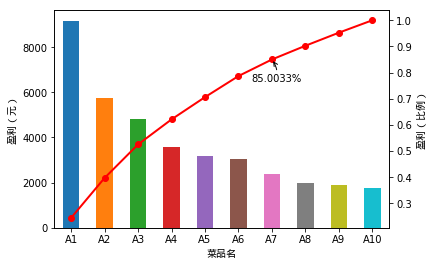

In [18]:
#plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# bar图
plt.figure()
data.plot(kind='bar')
plt.ylabel('盈利（元）', fontproperties=myfont)
plt.xlabel('菜品名',fontproperties=myfont)

# 折线图
p = 1.0*data.cumsum()/data.sum() #累积值除以总和 #p is DataFrame
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) #添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.ylabel('盈利（比例）', fontproperties=myfont)
plt.show()

### 相关度分析

#### 直接绘制散点图

可用于判断两个变量是否具有相关关系: 如正线性相关, 负线性相关, 非线性相关, 不相关等



#### 绘制散点图矩阵

同事考察多个变量见的关系时, 一一绘制它们间的简单散点图比较麻烦. 此时可以利用散点图矩阵同时绘制各变量间的散点图, 快速发现多个变量间的主要相关性.

#### 计算相关系数

为了定量描述变量之间的线性相关程度, 可以通过计算相关系数来进行相关分析. 二元变量的相关分析过程中比较常用的有:
* Pearson相关系数
* Spearman秩相关系数
* 判定系数

-----

#### 主成分分析

In [19]:
import pandas as pd

inputfile = './chapter4/demo/data/principal_component.xls'
outputfile = './chapter4/demo/tmp/dimention_reducted.xls'

In [20]:
data = pd.read_excel(inputfile, header=None)

In [21]:
data

,0,1,2,3,4,5,6,7
0,40.4,24.7,7.2,6.1,8.3,8.7,2.442,20.0
1,25.0,12.7,11.2,11.0,12.9,20.2,3.542,9.1
2,13.2,3.3,3.9,4.3,4.4,5.5,0.578,3.6
3,22.3,6.7,5.6,3.7,6.0,7.4,0.176,7.3
4,34.3,11.8,7.1,7.1,8.0,8.9,1.726,27.5
5,35.6,12.5,16.4,16.7,22.8,29.3,3.017,26.6
6,22.0,7.8,9.9,10.2,12.6,17.6,0.847,10.6
7,48.4,13.4,10.9,9.9,10.9,13.9,1.772,17.8
8,40.6,19.1,19.8,19.0,29.7,39.6,2.449,35.8
9,24.8,8.0,9.8,8.9,11.9,16.2,0.789,13.7


In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA()

In [24]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
v = pca.components_
v

array([[ 0.56788461,  0.2280431 ,  0.23281436,  0.22427336,  0.3358618 ,
         0.43679539,  0.03861081,  0.46466998],
       [ 0.64801531,  0.24732373, -0.17085432, -0.2089819 , -0.36050922,
        -0.55908747,  0.00186891,  0.05910423],
       [-0.45139763,  0.23802089, -0.17685792, -0.11843804, -0.05173347,
        -0.20091919, -0.00124421,  0.80699041],
       [-0.19404741,  0.9021939 , -0.00730164, -0.01424541,  0.03106289,
         0.12563004,  0.11152105, -0.3448924 ],
       [-0.06133747, -0.03383817,  0.12652433,  0.64325682, -0.3896425 ,
        -0.10681901,  0.63233277,  0.04720838],
       [ 0.02579655, -0.06678747,  0.12816343, -0.57023937, -0.52642373,
         0.52280144,  0.31167833,  0.0754221 ],
       [-0.03800378,  0.09520111,  0.15593386,  0.34300352, -0.56640021,
         0.18985251, -0.69902952,  0.04505823],
       [-0.10147399,  0.03937889,  0.91023327, -0.18760016,  0.06193777,
        -0.34598258, -0.02090066,  0.02137393]])

In [26]:
pca.explained_variance_ratio_

array([7.74011263e-01, 1.56949443e-01, 4.27594216e-02, 2.40659228e-02,
       1.50278048e-03, 4.10990447e-04, 2.07718405e-04, 9.24594471e-05])

In [27]:
import numpy as np

In [28]:
left_result = np.dot(data.values, v[:,0])
left_result

array([32.10780807, 13.90854876,  6.52439628, 12.83514797, 19.42512309,
       14.21684932,  9.67321418, 27.14413039, 18.28261372, 11.38475145,
       10.12999825,  0.83489397, 19.42233994, 19.26346992])

还是没有弄懂PCA --- 2018.5.14

-----

### 挖掘建模

**建模分析天气, 是否周末, 是否有促销活动对销量的影响**

#### 决策树算法:ID3算法

In [29]:
import pandas as pd

#参数初始化
inputfile = './chapter5/demo/data/sales_data.xls'
data = pd.read_excel(inputfile, index_col = '序号') #导入数据

In [30]:
data

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高
6,坏,否,是,高
7,坏,是,否,高
8,好,是,是,高
9,好,是,否,高


In [31]:
#数据是类别标签，要将它转换为数据
#用1来表示“好”、“是”、“高”这三个属性，用-1来表示“坏”、“否”、“低”
data[data == '好'] = 1
data[data == '是'] = 1
data[data == '高'] = 1
data[data != 1] = -1
x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)

from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC(criterion='entropy') #建立决策树模型，基于信息熵
dtc.fit(x, y) #训练模型

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
data.iloc[:,:3]

,天气,是否周末,是否有促销
序号,,,
1,-1,1,1
2,-1,1,1
3,-1,1,1
4,-1,-1,1
5,-1,1,1
6,-1,-1,1
7,-1,1,-1
8,1,1,1
9,1,1,-1


In [33]:
#导入相关函数，可视化决策树。
#导出的结果是一个dot文件，需要安装Graphviz才能将它转换为pdf或png等格式。
from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO
x = pd.DataFrame(x, columns=['天气', '是否周末', '是否有促销']) #注意补上丢掉的字段名, 以便最终显示有意义的图

x = pd.DataFrame(x)
with open("tree.dot", 'w') as f:
    f = export_graphviz(dtc, feature_names = x.columns, out_file = f)

#### 神经网络算法

In [34]:
import pandas as pd

inputfile = './chapter5/demo/data/sales_data.xls'
data = pd.read_excel(inputfile, index_col='序号')

In [35]:
data.shape

(34, 4)

In [36]:
data.columns

Index(['天气', '是否周末', '是否有促销', '销量'], dtype='object')

In [37]:
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高


In [38]:
data[data == '好'] = 1

In [39]:
data.head(10)

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高
6,坏,否,是,高
7,坏,是,否,高
8,1,是,是,高
9,1,是,否,高


In [40]:
data[data == '是'] = 1
data[data == '高'] = 1

In [41]:
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,1,1,1
2,坏,1,1,1
3,坏,1,1,1
4,坏,否,1,1
5,坏,1,1,1


In [42]:
data[data != 1] = 0

In [43]:
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,0,1,1,1
2,0,1,1,1
3,0,1,1,1
4,0,0,1,1
5,0,1,1,1


In [44]:
x = data.iloc[:, :3].as_matrix().astype(int)
y = data.iloc[:, 3].as_matrix().astype(int)

In [45]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

/home/vin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [46]:
model = Sequential()

In [47]:
model.add(Dense(input_dim=3, units=10))

In [48]:
model.add(Activation('relu'))

In [49]:
model.add(Dense(input_dim=10, units=1))

In [50]:
model.add(Activation('sigmoid'))

In [51]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
model.fit(x, y, epochs=1000, batch_size=10)

Epoch 1/1000
34/34 [==============================] - 0s 6ms/step - loss: 0.7050
Epoch 2/1000
34/34 [==============================] - 0s 279us/step - loss: 0.7039
Epoch 3/1000
34/34 [==============================] - 0s 330us/step - loss: 0.7032
Epoch 4/1000
34/34 [==============================] - 0s 440us/step - loss: 0.7022
Epoch 5/1000
34/34 [==============================] - 0s 260us/step - loss: 0.7014
Epoch 6/1000
34/34 [==============================] - 0s 320us/step - loss: 0.7008
Epoch 7/1000
34/34 [==============================] - 0s 369us/step - loss: 0.6998
Epoch 8/1000
34/34 [==============================] - 0s 366us/step - loss: 0.6991
Epoch 9/1000
34/34 [==============================] - 0s 392us/step - loss: 0.6983
Epoch 10/1000
34/34 [==============================] - 0s 341us/step - loss: 0.6977
Epoch 11/1000
34/34 [==============================] - 0s 378us/step - loss: 0.6968
Epoch 12/1000
34/34 [==============================] - 0s 378us/step - loss: 0.6962
Epo

34/34 [==============================] - 0s 371us/step - loss: 0.5164
Epoch 195/1000
34/34 [==============================] - 0s 287us/step - loss: 0.5157
Epoch 196/1000
34/34 [==============================] - 0s 384us/step - loss: 0.5152
Epoch 197/1000
34/34 [==============================] - 0s 354us/step - loss: 0.5144
Epoch 198/1000
34/34 [==============================] - 0s 377us/step - loss: 0.5139
Epoch 199/1000
34/34 [==============================] - 0s 287us/step - loss: 0.5135
Epoch 200/1000
34/34 [==============================] - 0s 306us/step - loss: 0.5129
Epoch 201/1000
34/34 [==============================] - 0s 342us/step - loss: 0.5123
Epoch 202/1000
34/34 [==============================] - 0s 344us/step - loss: 0.5118
Epoch 203/1000
34/34 [==============================] - 0s 283us/step - loss: 0.5114
Epoch 204/1000
34/34 [==============================] - 0s 313us/step - loss: 0.5109
Epoch 205/1000
34/34 [==============================] - 0s 375us/step - loss: 0.

34/34 [==============================] - 0s 417us/step - loss: 0.4640
Epoch 387/1000
34/34 [==============================] - 0s 322us/step - loss: 0.4636
Epoch 388/1000
34/34 [==============================] - 0s 334us/step - loss: 0.4637
Epoch 389/1000
34/34 [==============================] - 0s 298us/step - loss: 0.4636
Epoch 390/1000
34/34 [==============================] - 0s 350us/step - loss: 0.4635
Epoch 391/1000
34/34 [==============================] - 0s 339us/step - loss: 0.4634
Epoch 392/1000
34/34 [==============================] - 0s 331us/step - loss: 0.4633
Epoch 393/1000
34/34 [==============================] - 0s 518us/step - loss: 0.4632
Epoch 394/1000
34/34 [==============================] - 0s 415us/step - loss: 0.4629
Epoch 395/1000
34/34 [==============================] - 0s 327us/step - loss: 0.4628
Epoch 396/1000
34/34 [==============================] - 0s 276us/step - loss: 0.4628
Epoch 397/1000
34/34 [==============================] - 0s 296us/step - loss: 0.

34/34 [==============================] - 0s 356us/step - loss: 0.4531
Epoch 579/1000
34/34 [==============================] - 0s 334us/step - loss: 0.4530
Epoch 580/1000
34/34 [==============================] - 0s 404us/step - loss: 0.4534
Epoch 581/1000
34/34 [==============================] - 0s 291us/step - loss: 0.4530
Epoch 582/1000
34/34 [==============================] - 0s 287us/step - loss: 0.4532
Epoch 583/1000
34/34 [==============================] - 0s 363us/step - loss: 0.4532
Epoch 584/1000
34/34 [==============================] - 0s 341us/step - loss: 0.4529
Epoch 585/1000
34/34 [==============================] - 0s 306us/step - loss: 0.4529
Epoch 586/1000
34/34 [==============================] - 0s 250us/step - loss: 0.4529
Epoch 587/1000
34/34 [==============================] - 0s 395us/step - loss: 0.4529
Epoch 588/1000
34/34 [==============================] - 0s 310us/step - loss: 0.4529
Epoch 589/1000
34/34 [==============================] - 0s 298us/step - loss: 0.

34/34 [==============================] - 0s 349us/step - loss: 0.4500
Epoch 771/1000
34/34 [==============================] - 0s 243us/step - loss: 0.4499
Epoch 772/1000
34/34 [==============================] - 0s 318us/step - loss: 0.4503
Epoch 773/1000
34/34 [==============================] - 0s 318us/step - loss: 0.4499
Epoch 774/1000
34/34 [==============================] - 0s 436us/step - loss: 0.4497
Epoch 775/1000
34/34 [==============================] - 0s 421us/step - loss: 0.4498
Epoch 776/1000
34/34 [==============================] - 0s 263us/step - loss: 0.4498
Epoch 777/1000
34/34 [==============================] - 0s 298us/step - loss: 0.4499
Epoch 778/1000
34/34 [==============================] - 0s 394us/step - loss: 0.4499
Epoch 779/1000
34/34 [==============================] - 0s 313us/step - loss: 0.4497
Epoch 780/1000
34/34 [==============================] - 0s 655us/step - loss: 0.4497
Epoch 781/1000
34/34 [==============================] - 0s 310us/step - loss: 0.

34/34 [==============================] - 0s 298us/step - loss: 0.4482
Epoch 963/1000
34/34 [==============================] - 0s 400us/step - loss: 0.4482
Epoch 964/1000
34/34 [==============================] - 0s 277us/step - loss: 0.4483
Epoch 965/1000
34/34 [==============================] - 0s 259us/step - loss: 0.4482
Epoch 966/1000
34/34 [==============================] - 0s 430us/step - loss: 0.4483
Epoch 967/1000
34/34 [==============================] - 0s 270us/step - loss: 0.4485
Epoch 968/1000
34/34 [==============================] - 0s 374us/step - loss: 0.4482
Epoch 969/1000
34/34 [==============================] - 0s 308us/step - loss: 0.4486
Epoch 970/1000
34/34 [==============================] - 0s 300us/step - loss: 0.4483
Epoch 971/1000
34/34 [==============================] - 0s 313us/step - loss: 0.4483
Epoch 972/1000
34/34 [==============================] - 0s 288us/step - loss: 0.4484
Epoch 973/1000
34/34 [==============================] - 0s 366us/step - loss: 0.

In [53]:
yhat = model.predict_classes(x).reshape(len(y))

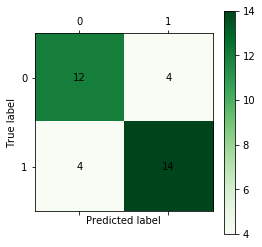

In [56]:
import sys
sys.path.append('./chapter5/demo/code')
from cm_plot import cm_plot

cm_plot(y, yhat).show()

从图中可以看到, 检测样本为34个, 预测正确的个数为26个, 预测准确率为76.4%, 预测准确率较低.(由于这里的训练数据较少)

#### K-Means聚类

In [4]:
import pandas as pd

inputfile = './chapter5/demo/data/consumption_data.xls' #销量和其他属性数据
ouputfile = './data_type.xls'

In [5]:
k = 3 #聚类成的类数量
iteration = 500 #聚类最大循环次数

In [6]:
data = pd.read_excel(inputfile, index_col='Id')
data_zs = (data - data.mean()) / data.std() #数据标准化

In [7]:
data_zs

,R,F,M
Id,,,
1,0.764186,-0.493579,-1.158711
2,-1.024757,-0.630079,0.622527
3,-0.950217,0.871423,-0.341103
4,-1.024757,0.188922,-1.158432
5,-0.204824,-0.357079,1.189868
6,0.167872,-0.493579,-1.176237
7,-0.875678,-1.039580,-0.623124
8,0.689647,-1.039580,-0.002828
9,0.316951,-0.084078,-1.057791


In [8]:
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=k, n_jobs=4, max_iter=iteration) #分为k类,并发数4

In [11]:
model.fit(data_zs) #开始聚类

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
r1 = pd.Series(model.labels_).value_counts()

In [27]:
r1

0    560
2    340
1     40
dtype: int64

In [28]:
r2 = pd.DataFrame(model.cluster_centers_)

In [29]:
r2

,0,1,2
0,-0.147855,-0.656892,-0.272251
1,3.455055,-0.295654,0.449123
2,-0.162951,1.116722,0.395575


In [32]:
r = pd.concat([r2, r1], axis=1)

In [33]:
r

,0,1,2,0
0,-0.147855,-0.656892,-0.272251,560
1,3.455055,-0.295654,0.449123,40
2,-0.162951,1.116722,0.395575,340


In [34]:
r.columns = list(data.columns) +['类别数目']

In [36]:
r

,R,F,M,类别数目
0,-0.147855,-0.656892,-0.272251,560
1,3.455055,-0.295654,0.449123,40
2,-0.162951,1.116722,0.395575,340


In [39]:
r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1)

In [40]:
r.columns = list(data.columns) + ['聚类类别']
r.to_excel(ouputfile)

In [41]:
r

,R,F,M,聚类类别
Id,,,,
1,27,6,232.61,0
2,3,5,1507.11,0
3,4,16,817.62,2
4,3,11,232.81,0
5,14,7,1913.05,0
6,19,6,220.07,0
7,5,2,615.83,0
8,26,2,1059.66,0
9,21,9,304.82,0


/home/vin/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


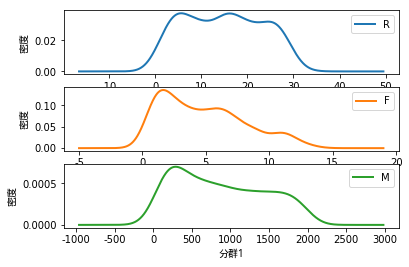

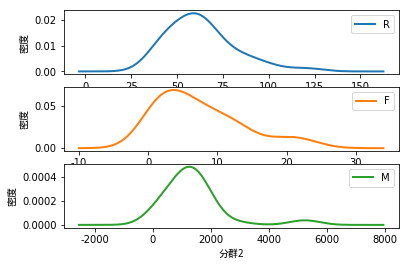

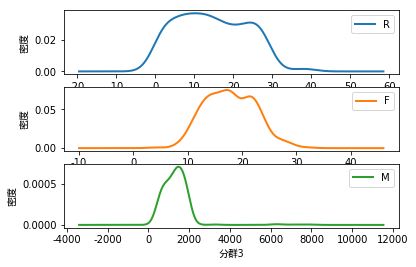

In [53]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname='/usr/share/fonts/truetype/wqy/wqy-microhei.ttc')  

def density_plot(data, cluster_name): #自定义作图函数
    import matplotlib.pyplot as plt
    #plt.rcParams['font.sans-serif'] = [myfont] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
    p = data.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
    [p[i].set_ylabel('密度', fontproperties=myfont) for i in range(k)]
    [p[i].set_xlabel('分群'+str(cluster_name+1), fontproperties=myfont) for i in range(k)] #新增显示xlabel,即显示分群名称
    plt.legend()
    return plt

pic_output = './pd_' #概率密度图文件名前缀
for i in range(k):
    density_plot(data[r['聚类类别']==i], i).savefig(u'%s%s.png' %(pic_output, i))

用TSNE进行数据降维并展示聚类结果

In [54]:
from sklearn.manifold import TSNE

In [55]:
tsne = TSNE()

In [56]:
tsne.fit_transform(data_zs)

array([[-19.450201  , -18.983776  ],
       [ -8.407101  ,  26.862123  ],
       [ 18.666475  , -24.1724    ],
       ...,
       [  0.35076404,   0.31766558],
       [ -8.41565   ,  -0.03227807],
       [-18.68573   ,   0.47895592]], dtype=float32)

In [57]:
tsne = pd.DataFrame(tsne.embedding_, index = data_zs.index)

In [58]:
import matplotlib.pyplot as plt

/home/vin/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


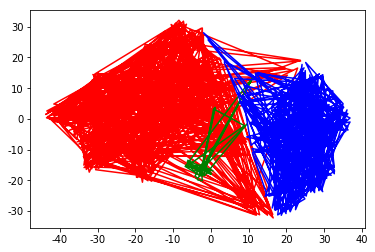

In [68]:
d = tsne[r['聚类类别'] == 0]
plt.plot(d[0], d[1], 'r-')

d = tsne[r['聚类类别'] == 1]
plt.plot(d[0], d[1], 'g-')

d = tsne[r['聚类类别'] == 2]
plt.plot(d[0], d[1], 'b-')

plt.show()

#### 关联分析(购物篮分析)

常用关联规则算法:

|算法|介绍|
|---------|:---------:|
|Apriori | 关联规则最常用, 最经典的挖掘频繁项集的算法, 核心思想是通过连接产生候选项及其支持度然后通过剪枝生成频繁项集|
|FP-Tree|针对Aprior的改良算法|
|Eclat算法||
|灰色关联法||

Apriori算法